In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
import numpy as np


In [2]:
# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_excel('telstar_measure_data.xlsx', sheet_name='PartTrackingReport',skiprows=range(1, 4), parse_dates=["투입시간","생산일자(완성)"])
df.head()

,공장,라인,투입시간,생산일자(완성),파트시리얼,POP_010_020,Unnamed: 6,POP_010_030,Unnamed: 8,POP_010_040,...,POP_080_030,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142
0,신U 조립,U,2019-06-01 오전 8:40:08,2019-06-01 오전 9:43:11,19051623310145A,419.922,169.399,226.563,174.3,420.507,...,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK
1,신U 조립,U,2019-06-01 오전 8:40:38,2019-06-01 오전 9:44:13,19051623320146A,324.219,169.399,232.422,174.3,420.537,...,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK
2,신U 조립,U,2019-06-01 오전 8:40:59,2019-06-01 오전 9:45:12,19051623330147A,275.391,169.399,179.688,174.3,420.462,...,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK
3,신U 조립,U,2019-06-01 오전 8:41:29,2019-06-01 오전 9:46:20,19051623360149A,287.110,169.399,246.094,174.3,420.552,...,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK
4,신U 조립,U,2019-06-01 오전 8:41:50,2019-06-01 오전 9:47:31,19051623350148A,414.063,169.399,228.516,174.3,420.523,...,OK,OK,OK,OK,OK,OK,OK,OK,OK,OK


In [23]:
v = df.values

In [47]:
df.describe()

,POP_010_020,Unnamed: 6,POP_010_030,Unnamed: 8,POP_010_040,Unnamed: 10,Unnamed: 11,Unnamed: 12,POP_010_050,POP_040_030,...,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,POP_070_050,Unnamed: 127,Unnamed: 128,Unnamed: 129,POP_070_060,POP_080_020
count,8818.000000,8818.000000,8818.000000,8.818000e+03,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,...,8692.000000,8693.000000,8692.000000,8693.000000,8692.000000,8.692000e+03,8692.000000,8692.000000,8692.000000,8691.000000
mean,420.492511,169.399755,247.335435,1.743000e+02,420.496038,416.922661,0.006407,0.014313,0.824646,441.476811,...,11.504567,11.515219,11.509238,11.503532,417.311584,1.829970e+02,358.068562,182.497970,107.294765,-2.006442
std,89.503776,0.000552,37.351658,2.785485e-11,0.035596,0.044546,0.005223,0.011222,0.033944,0.048690,...,0.020879,0.036114,0.030355,0.036628,35.731945,2.134593e-11,24.620714,0.001112,0.227262,5.391602
min,257.813000,169.399000,177.735000,1.743000e+02,420.358000,416.785000,0.000000,0.000000,0.721000,441.315000,...,11.500000,11.200000,10.700000,8.800000,200.000000,1.829970e+02,215.333000,182.497000,106.400000,-14.993000
25%,341.797000,169.400000,224.610000,1.743000e+02,420.470000,416.893000,0.002000,0.006000,0.797000,441.442000,...,11.500000,11.500000,11.500000,11.500000,394.043000,1.829970e+02,342.774000,182.498000,107.100000,-5.443500
50%,417.969000,169.400000,238.282000,1.743000e+02,420.494000,416.921000,0.005000,0.012000,0.825000,441.476000,...,11.500000,11.500000,11.500000,11.500000,416.016000,1.829970e+02,357.422000,182.498000,107.300000,-1.934000
75%,486.329000,169.400000,251.954000,1.743000e+02,420.521000,416.949000,0.009000,0.021000,0.851000,441.510000,...,11.500000,11.500000,11.500000,11.500000,439.454000,1.829970e+02,373.536000,182.498000,107.400000,1.243000
max,697.266000,169.432000,498.047000,1.743000e+02,420.614000,417.232000,0.033000,0.077000,0.952000,441.684000,...,11.600000,11.600000,11.600000,11.600000,550.000000,1.829970e+02,459.961000,182.600000,108.200000,16.998000


In [13]:
df.columns[1:]

Index(['라인', '투입시간', '생산일자(완성)', '파트시리얼', 'POP_010_020', 'Unnamed: 6',
       'POP_010_030', 'Unnamed: 8', 'POP_010_040', 'Unnamed: 10',
       ...
       'POP_080_030', 'Unnamed: 134', 'Unnamed: 135', 'Unnamed: 136',
       'Unnamed: 137', 'Unnamed: 138', 'Unnamed: 139', 'Unnamed: 140',
       'Unnamed: 141', 'Unnamed: 142'],
      dtype='object', length=142)

In [14]:
#v = df.as_matrix(columns=df.columns[1:])
#type(v)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [27]:
v[7:10]

array([['신U 조립', 'U', '2019-06-01 오전 8:43:41', '2019-06-01 오전 9:50:19',
        '19051623160133A', 306.64099999999996, 169.399, 228.516, 174.3,
        420.491, 416.841, 0.001, 0.025, 0.7609999999999999, 'OK',
        441.42900000000003, 420.279, 0.025, -0.016, 0.02, 0.043, 3.02,
        0.32, 0.424, 0.381, 0.29100000000000004, 0.355, 0.34, 0.33,
        0.278, 0.406, 0.17800000000000002, 0.142, 0.15, 0.2, 0.111,
        0.076, 0.113, 0.10800000000000001, 0.0109, 0.0075, 0.0189,
        0.0091, 0.0057, 0.0106, 0.0074, -0.0073, 0.0134, 0.0071, 0.0084,
        0.0051, 0.0042, 0.0052, 0.0003, -0.0051, 0.0186, 0.0077, 0.0067,
        0.008, 0.0102, 0.005, 0.0065, 0.0069, -0.06, -0.05, 0.17, 0.09,
        -0.05, -0.06, -0.3, -0.34, -0.0148, -0.0092, -0.0058, -0.0111,
        -0.0085, -0.0186, -0.0124, 0.0025, -0.0068, -0.0094, -0.0056,
        -0.0064, -0.0084, -0.0076, -0.0079, -0.0033, 0.0101, 0.0028,
        0.0086, 0.0092, 0.0085, 0.0104, 0.0063, 0.0048, -0.0181, 0.25,
        -0.11, -0

In [49]:
df.values[:,15:17]

array([[441.50800000000004, 420.22],
       [441.543, 420.217],
       [441.48800000000006, 420.23900000000003],
       ...,
       [441.514, 420.23800000000006],
       [441.467, 420.279],
       [441.514, 420.32099999999997]], dtype=object)

In [48]:
# basic linear regression
model1 = linear_model.LinearRegression()
x_vars1 = ["POP_010_020", "POP_010_030"]
model1.fit(df.values[:,15:17], df.values[:,20])
print(model.coef_, model.intercept_)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Columns: 143 entries, 공장 to Unnamed: 142
dtypes: float64(126), object(17)
memory usage: 9.6+ MB


In [74]:
ds = df[:]

In [75]:
plt.rcParams["figure.figsize"] = (20,14)
plt.rcParams["figure.figsize"] 

[20.0, 14.0]

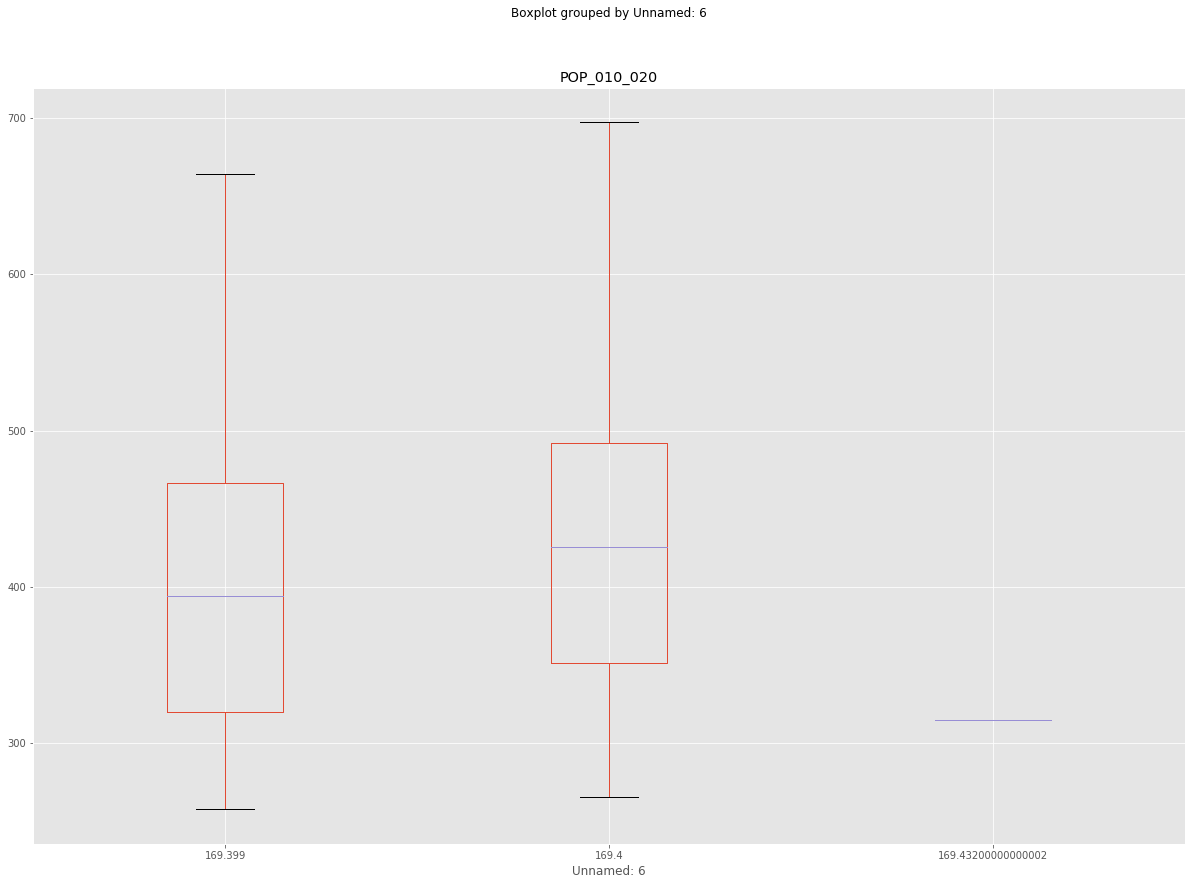

In [76]:
ds.boxplot(column=['POP_010_020'], by='Unnamed: 6')

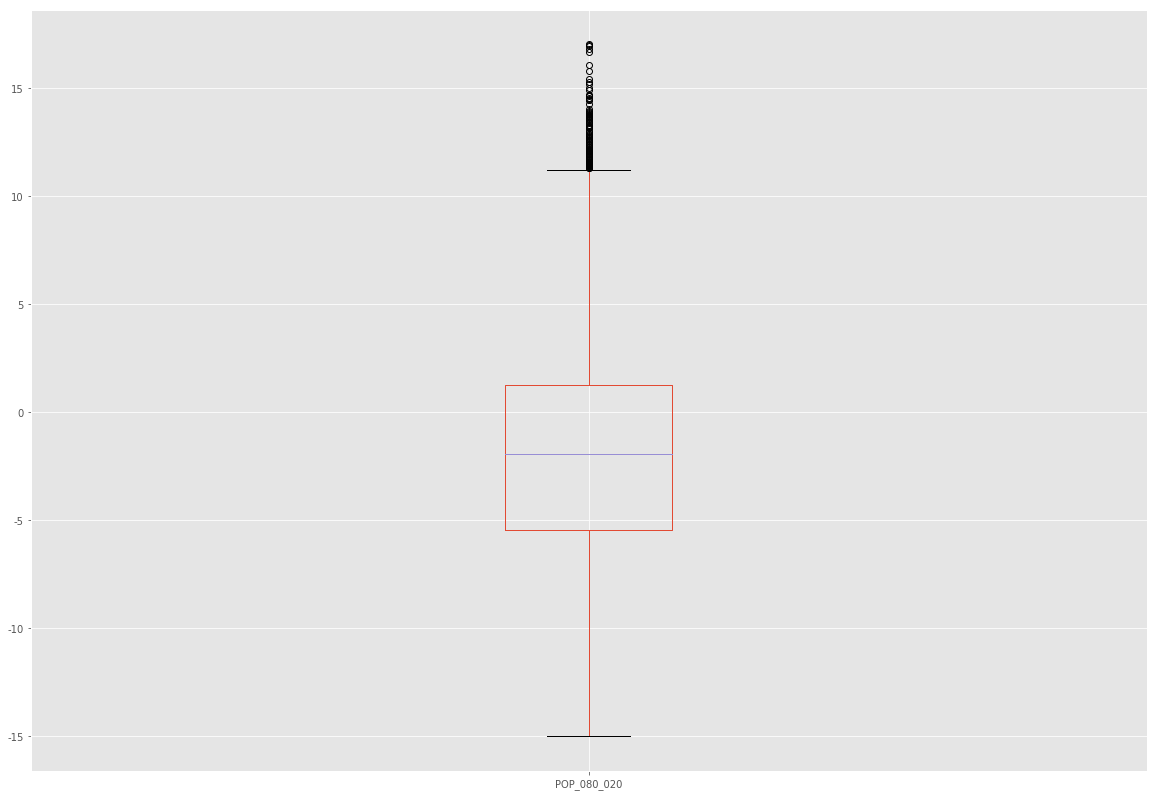

In [82]:
bp = df.boxplot(column=['POP_080_020'])

In [57]:
'''
#df.columns['공장'] = 'factory'
df.rename(columns={'공장':'factory'},inplace=True)
df.columns
'''

"\n#df.columns['공장'] = 'factory'\ndf.rename(columns={'공장':'factory'},inplace=True)\ndf.columns\n"

In [63]:
df.corr(method='pearson')

,POP_010_020,Unnamed: 6,POP_010_030,Unnamed: 8,POP_010_040,Unnamed: 10,Unnamed: 11,Unnamed: 12,POP_010_050,POP_040_030,...,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,POP_070_050,Unnamed: 127,Unnamed: 128,Unnamed: 129,POP_070_060,POP_080_020
POP_010_020,1.000000e+00,8.497844e-02,2.342829e-01,-1.669250e-13,1.247055e-01,3.200996e-01,8.174236e-02,1.256809e-01,1.498000e-02,1.205835e-01,...,1.127782e-02,2.821782e-02,8.198422e-03,-5.575587e-03,-8.509306e-02,1.602378e-13,-5.750334e-02,-7.940015e-03,-1.732045e-02,6.155158e-03
Unnamed: 6,8.497844e-02,1.000000e+00,4.521063e-02,-4.781632e-08,-1.442709e-02,6.954880e-02,1.342017e-01,3.093686e-03,-2.500585e-02,-3.614072e-03,...,2.227053e-02,6.675382e-03,1.914257e-02,-2.820153e-03,-1.113019e-01,4.554858e-08,-6.005522e-02,-1.095405e-02,-4.318741e-02,1.219758e-02
POP_010_030,2.342829e-01,4.521063e-02,1.000000e+00,1.517415e-13,2.015561e-01,8.866888e-02,5.679422e-02,-6.493919e-02,-1.159752e-02,9.692288e-02,...,1.145646e-02,-4.735057e-03,-4.702507e-03,4.552858e-03,1.233631e-01,-1.654416e-13,8.667020e-02,1.196353e-03,8.114176e-03,9.790202e-03
Unnamed: 8,-1.669250e-13,-4.781632e-08,1.517415e-13,1.000000e+00,2.492376e-11,-1.117365e-11,3.784437e-14,3.800858e-14,-4.947189e-14,-3.340816e-12,...,2.383488e-12,5.086410e-12,4.017301e-12,1.417639e-12,5.870680e-14,-1.000000e+00,7.611212e-14,-1.764920e-08,-2.343406e-12,9.956458e-16
POP_010_040,1.247055e-01,-1.442709e-02,2.015561e-01,2.492376e-11,1.000000e+00,3.172186e-01,1.053976e-01,-3.908936e-02,7.010669e-03,5.730751e-01,...,-4.819759e-03,1.215432e-02,1.532224e-02,-5.303331e-03,1.760779e-01,-2.304053e-11,1.185903e-01,-6.216395e-03,-6.554462e-03,1.232041e-02
Unnamed: 10,3.200996e-01,6.954880e-02,8.866888e-02,-1.117365e-11,3.172186e-01,1.000000e+00,1.633816e-01,2.284011e-01,-8.595970e-03,3.178079e-01,...,-7.110555e-03,-1.003324e-03,-1.174951e-03,2.144934e-03,9.493878e-02,1.392325e-11,7.600821e-02,-6.993812e-03,-1.555671e-02,-3.337316e-03
Unnamed: 11,8.174236e-02,1.342017e-01,5.679422e-02,3.784437e-14,1.053976e-01,1.633816e-01,1.000000e+00,-1.155577e-02,-6.134343e-02,9.088423e-02,...,-3.080384e-02,-9.613243e-03,5.647436e-03,1.038960e-02,-1.941199e-01,-1.974593e-14,-1.544497e-01,-2.310231e-02,-9.927734e-03,-1.520657e-02
Unnamed: 12,1.256809e-01,3.093686e-03,-6.493919e-02,3.800858e-14,-3.908936e-02,2.284011e-01,-1.155577e-02,1.000000e+00,2.538230e-02,1.610984e-02,...,-2.641064e-03,2.479539e-02,-1.354587e-02,6.161543e-03,-6.674034e-03,-3.665247e-14,-6.069193e-03,-8.336398e-03,-4.630812e-03,-5.787282e-03
POP_010_050,1.498000e-02,-2.500585e-02,-1.159752e-02,-4.947189e-14,7.010669e-03,-8.595970e-03,-6.134343e-02,2.538230e-02,1.000000e+00,5.150751e-01,...,1.200255e-02,1.008858e-02,9.770941e-03,2.764141e-03,6.480794e-03,3.004043e-14,-2.755808e-02,1.742429e-02,-2.201403e-02,-5.198441e-03
POP_040_030,1.205835e-01,-3.614072e-03,9.692288e-02,-3.340816e-12,5.730751e-01,3.178079e-01,9.088423e-02,1.610984e-02,5.150751e-01,1.000000e+00,...,4.794626e-03,1.811196e-02,2.471010e-02,-1.947669e-03,1.351168e-01,6.400070e-13,9.798508e-02,-2.905589e-03,-1.407781e-02,6.174914e-03


In [83]:
df.describe()

,POP_010_020,Unnamed: 6,POP_010_030,Unnamed: 8,POP_010_040,Unnamed: 10,Unnamed: 11,Unnamed: 12,POP_010_050,POP_040_030,...,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,POP_070_050,Unnamed: 127,Unnamed: 128,Unnamed: 129,POP_070_060,POP_080_020
count,8818.000000,8818.000000,8818.000000,8.818000e+03,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,...,8692.000000,8693.000000,8692.000000,8693.000000,8692.000000,8.692000e+03,8692.000000,8692.000000,8692.000000,8691.000000
mean,420.492511,169.399755,247.335435,1.743000e+02,420.496038,416.922661,0.006407,0.014313,0.824646,441.476811,...,11.504567,11.515219,11.509238,11.503532,417.311584,1.829970e+02,358.068562,182.497970,107.294765,-2.006442
std,89.503776,0.000552,37.351658,2.842332e-14,0.035596,0.044546,0.005223,0.011222,0.033944,0.048690,...,0.020879,0.036114,0.030355,0.036628,35.731945,2.842334e-14,24.620714,0.001112,0.227262,5.391602
min,257.813000,169.399000,177.735000,1.743000e+02,420.358000,416.785000,0.000000,0.000000,0.721000,441.315000,...,11.500000,11.200000,10.700000,8.800000,200.000000,1.829970e+02,215.333000,182.497000,106.400000,-14.993000
25%,341.797000,169.400000,224.610000,1.743000e+02,420.470000,416.893000,0.002000,0.006000,0.797000,441.442000,...,11.500000,11.500000,11.500000,11.500000,394.043000,1.829970e+02,342.774000,182.498000,107.100000,-5.443500
50%,417.969000,169.400000,238.282000,1.743000e+02,420.494000,416.921000,0.005000,0.012000,0.825000,441.476000,...,11.500000,11.500000,11.500000,11.500000,416.016000,1.829970e+02,357.422000,182.498000,107.300000,-1.934000
75%,486.329000,169.400000,251.954000,1.743000e+02,420.521000,416.949000,0.009000,0.021000,0.851000,441.510000,...,11.500000,11.500000,11.500000,11.500000,439.454000,1.829970e+02,373.536000,182.498000,107.400000,1.243000
max,697.266000,169.432000,498.047000,1.743000e+02,420.614000,417.232000,0.033000,0.077000,0.952000,441.684000,...,11.600000,11.600000,11.600000,11.600000,550.000000,1.829970e+02,459.961000,182.600000,108.200000,16.998000


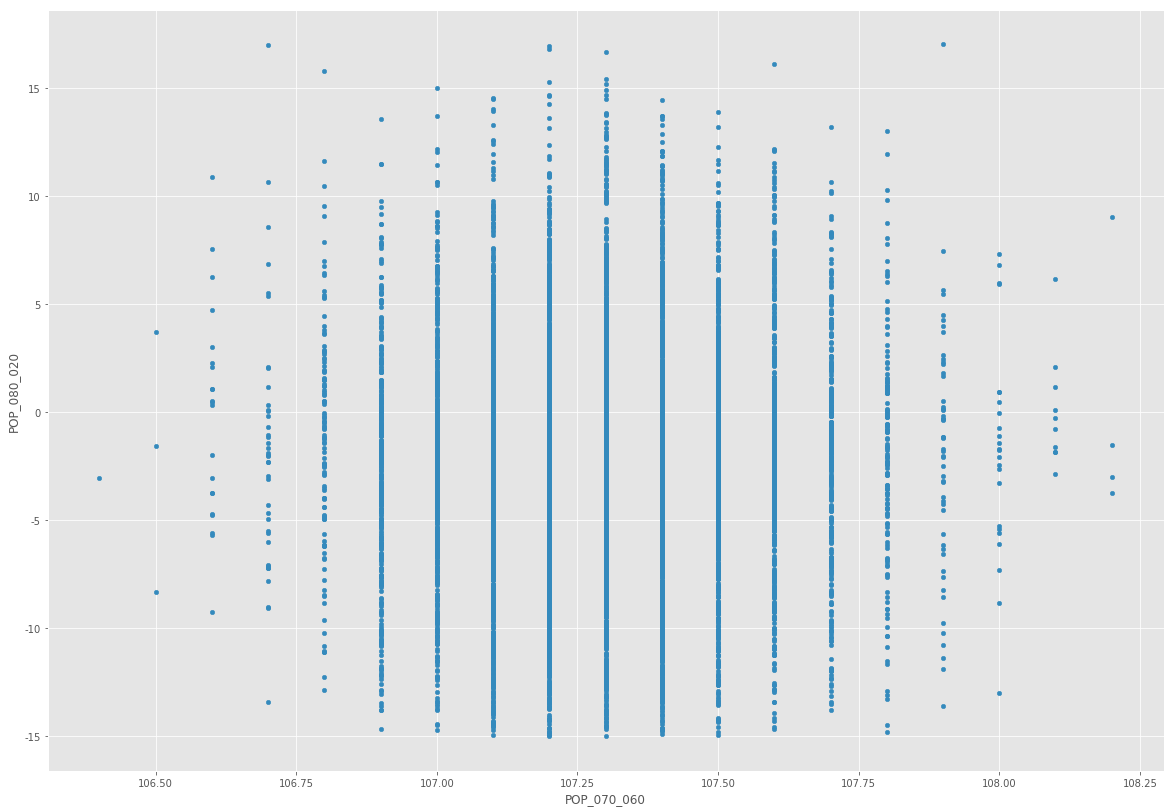

In [65]:
df.plot.scatter(x='POP_070_060', y='POP_080_020')